In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import os
import numpy as np



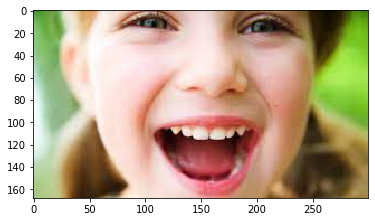

In [2]:
img = image.load_img("basedata/train/happy/h8.jpg")
plt.imshow(img)

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory('basedata/train/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode= 'binary'
                                         )

Found 23 images belonging to 2 classes.


In [5]:
validation_dataset = train.flow_from_directory('basedata/validation/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode= 'binary'
                                         )

Found 17 images belonging to 2 classes.


# Define model

In [6]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #Add second  layer
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #Add third layer
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #flatten out 
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                                                   
                                    
    
])

# Compile model

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(learning_rate=0.001),
              metrics = (['accuracy'])
)

In [8]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch=3,
                      epochs=30,
                      validation_data= validation_dataset
                     )

Epoch 1/30
3/3 [==============================] - 6s 1s/step - loss: 17.9866 - accuracy: 0.1250 - val_loss: 0.6457 - val_accuracy: 0.5882
Epoch 2/30
3/3 [==============================] - 2s 886ms/step - loss: 0.6353 - accuracy: 0.6667 - val_loss: 0.7455 - val_accuracy: 0.5882
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 0.7116 - accuracy: 0.4444 - val_loss: 0.4877 - val_accuracy: 0.7647
Epoch 4/30
3/3 [==============================] - 3s 935ms/step - loss: 0.6544 - accuracy: 0.5000 - val_loss: 0.4085 - val_accuracy: 0.8235
Epoch 5/30
3/3 [==============================] - 2s 854ms/step - loss: 0.5341 - accuracy: 0.6667 - val_loss: 0.3015 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 2s 858ms/step - loss: 0.8475 - accuracy: 0.6667 - val_loss: 1.2462 - val_accuracy: 0.5882
Epoch 7/30
3/3 [==============================] - 2s 858ms/step - loss: 1.3172 - accuracy: 0.5556 - val_loss: 0.4363 - val_accuracy: 0.7647
Epoch 8/30
3/3 [=========

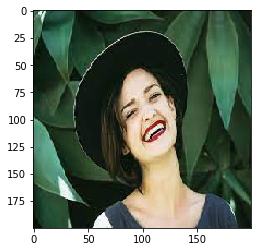

You are  happy!


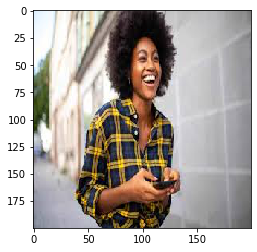

You are not happy!


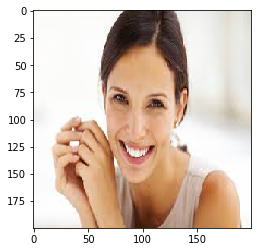

You are not happy!


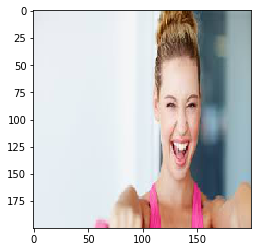

You are  happy!


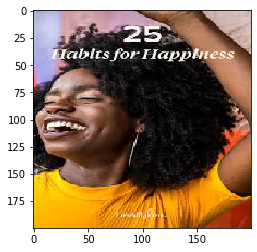

You are not happy!


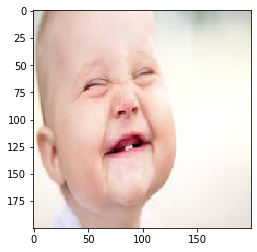

You are not happy!


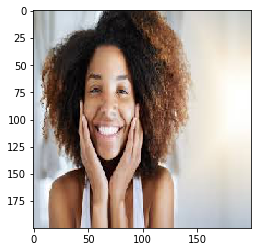

You are  happy!


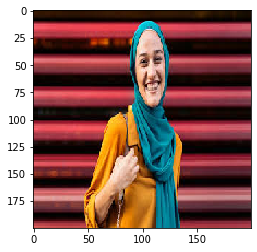

You are not happy!


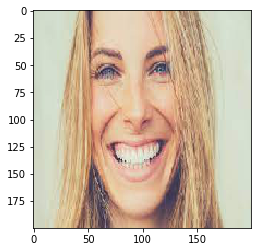

You are not happy!


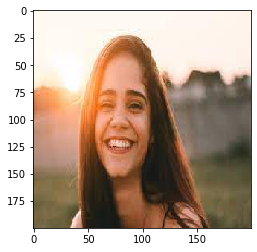

You are not happy!


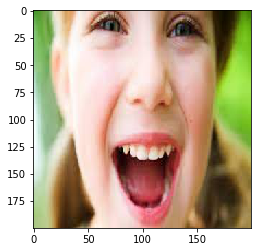

You are not happy!


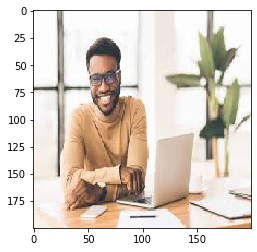

You are not happy!


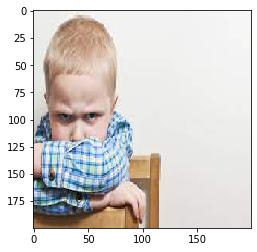

You are  happy!


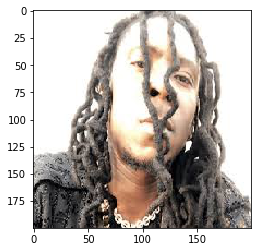

You are  happy!


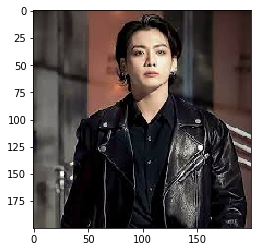

You are  happy!


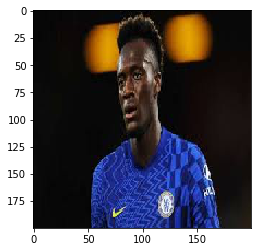

You are  happy!


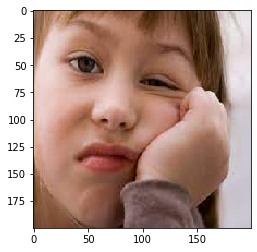

You are  happy!


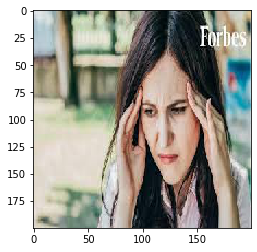

You are  happy!


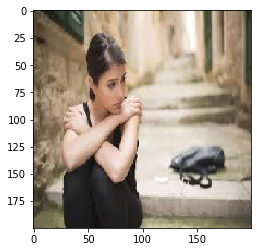

You are  happy!


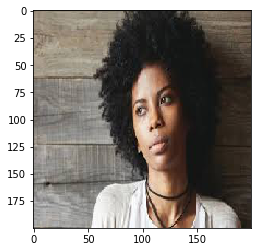

You are  happy!


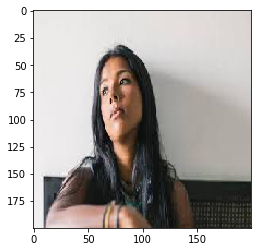

You are  happy!


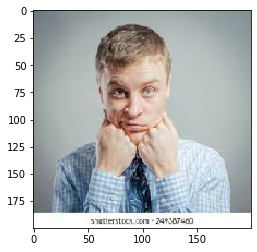

You are  happy!


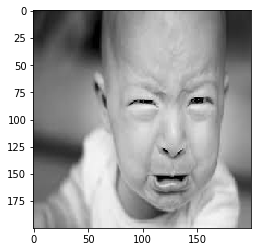

You are  happy!


In [12]:
dir_path = 'basedata/testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i, target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val ==1 :
        print("You are  happy!")
    else: print("You are not happy!")